
# Homework reflection 1
 1. In Coding Quiz 1, you are asked to find the distance of the farthest match in a set.  Is this farthest match distance too far to be a meaningful match?  How can you decide this?
 2. In Coding Quiz 1, there are two approaches to matching: 
 (A) Picking the best match X = 0 corresponding to each X = 1 using Z values.
 (B) Using radius_neighbors to pick all matches X = 0 within a distance of 0.2 of each X = 1.
 Invent your own type of matching similar to 1 and 2 (or look one up on the internet), which has a different way to pick the matches in X = 0.  Clearly explain the approach you invented or found.

**Reflection 1 answers**

1. In quiz 1, the farthest match distance found was 0.210. Comparing the distance with other given values, this 0.210 is as much bigger value.Most matches had much smaller distances, like 0.0023 or 0.07905. The value 0.210 which is correct answer for this quiz, which is larger than any other matches, so i would conclude that it on the edge of being meaningful match, but likely too far to be considered a good match.In practice we can avoid the bad matches by setting a cut-off value ( maximum  threshold to which the distance between them is acceptable), so matched value beyond that cut-off value would be dropped.

 
2. Inventing another matching approach: 
The quiz used two methods : 1. In Method A (best match)each treated unit (X = 1) is paired with its single closest control (X = 0) and in 
Method B (radius matching) each treated unit is paired with all controls within a distance of 0.2, which resulted in many duplicates (685).
As an alternative, I would use weighted nearest-neighbor matching. Instead of keeping only one match or all matches, assign weights to control units based on their closeness to the treated unit. Closer controls get higher weights, and farther controls get lower weights. This way, we can use multiple comparisons while still focusing on the most similar units, which helps give a more reliable estimate of the treatment effect (like the effect ≈ 0.54336 in the quiz).


# Homework Reflection 2 

1. Invent an example situation that would use fixed effects.
2. Write a Python program that performs a bootstrap simulation to find the variance in the mean of the Pareto distribution when different samples are taken.  Explain what you had to do for this.  As you make the full sample size bigger (for the same distribution), what happens to the variance of the mean of the samples?  Does it stay about the same, get smaller, or get bigger?

**Reflection 2 Answers**

# Homework reflection 3

1. In the event study in Coding Quiz 3, how would we go about testing for a change in the second derivative as well?
2. Create your own scenario that illustrates differences-in-differences. Describe the story behind the data and show whether there is a nonzero treatment effect.

**Reflection 3 Answers**

1. To test a change in the second derivative, the model need to include quadratic terms. First, calculate the second derivative, which tells us how the slope is changing over time. Then, compare the values before and after the event using a simple test (like time=50)or regression.
. In coding quiz , the test for change in slope using interaction term is as below



In [ ]:
#Create indicator for post-event (time >= 50)

df31['post_event'] = (df31['time'] >= 50).astype(int)

#Create interaction term for slope change after event

df31['time_post'] = df31['post_event'] * (df31['time'] - 50)



 For second derivative , adding quadratic term and interact with it. If the number changes a lot, it means the trend’s curvature has changed at that point  not just the level or slope.



In [ ]:
df31['time2'] = df31['time']**2
df31['time2_post'] = df31['post_event'] * df31['time2']

2. A differences-in-differences example is easier to understand with a story. Imagine a city adds a new bike lane in one neighborhood (treatment group) but not in another (control group). We measure car traffic before and after the bike lane is built. Suppose traffic in the treatment area drops a lot, but traffic in the control area only drops a little. The difference between these changes is the “treatment effect” of the bike lane. This method helps us see the effect of the policy while accounting for other things that could cause traffic to change over time, like weather or holidays. It’s like comparing the before-and-after change in one group, while subtracting what would have happened naturally in a group that didn’t get the treatment.

In [ ]:
# Differences-in-Differences example

# Traffic data (before and after) for treatment and control neighborhoods
treatment = {'Before': 200, 'After': 150}  #  with new bike lane
control   = {'Before': 180, 'After': 170}  # without bike lane
# Calculate the difference-in-differences treatment effect
treat_effect = (treatment['After'] - treatment['Before']) - (control['After'] - control['Before'])
print(f"Differences-in-Differences treatment effect: {treat_effect}")

# Homework reflection 4

1. The Coding Quiz gives two options for instrumental variables.  For the second item (dividing the range of W into multiple ranges), explain how you did it, show your code, and discuss any issues you encountered.
2. Plot the college outcome (Y) vs. the test score (X) in a small range of test scores around 80. On the plot, compare it with the Y probability predicted by logistic regression. The ground truth Y value is 0 or 1; don't just plot 0 or 1 - that will make it unreadable.  Find some way to make it look better than that.

**Reflection 4 Answers**

1. Instrumental Variables (IV):For the IV question, I calculated the effect of X on Y using the simple Wald estimator. I compared average Y and X across Z=1 and Z=0, then divided the differences.This gives a single IV estimate.The instructions mentioned dividing W into ranges, but I did not implement that part in my solution. If I had, I would have binned W into 8 bins, then created a for loop to calculate for each 8 bins the mean Y value and mean X value for Z = 1 and Z = 0 and calculated effects within each group, and averaged them. That would give a more fine estimate. I would have coded like this below.

In [13]:
import numpy as np
import pandas as pd

# load dataset
df = pd.read_csv("homework_4.1.csv")

# divide W into 8 bins
df["W_bin"] = pd.cut(df["W"], bins=8)

effects = []

# loop through each W bin and compute effect within it

for _, group in df.groupby("W_bin"):
    Y1, Y0 = group[group["Z"]==1]["Y"].mean(), group[group["Z"]==0]["Y"].mean()
    X1, X0 = group[group["Z"]==1]["X"].mean(), group[group["Z"]==0]["X"].mean()
    
    dY, dX = Y1 - Y0, X1 - X0
    if np.isfinite(dY) and np.isfinite(dX) and dX != 0:
        effects.append(dY / dX)

# final IV estimate = average across bins
avg_effect = np.mean(effects)
print("Average IV effect across bins:", avg_effect)


Average IV effect across bins: 1.5538785566767686


C:\Users\phxlab\AppData\Local\Temp\ipykernel_6908\75121396.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in df.groupby("W_bin"):


2. Initially , I visualised the data with slopes before and after cut off, which showed the relationship between test scores and admission different near the cutoff thershold. From the reflection question , i understood that fitting a probability curve gives much clearer picture for how admission changes around the cut off value. The logisitic curve smooths binary outcomes in to estimated probabiliites and gives more insights about the treatment effect. 

c:\Users\phxlab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


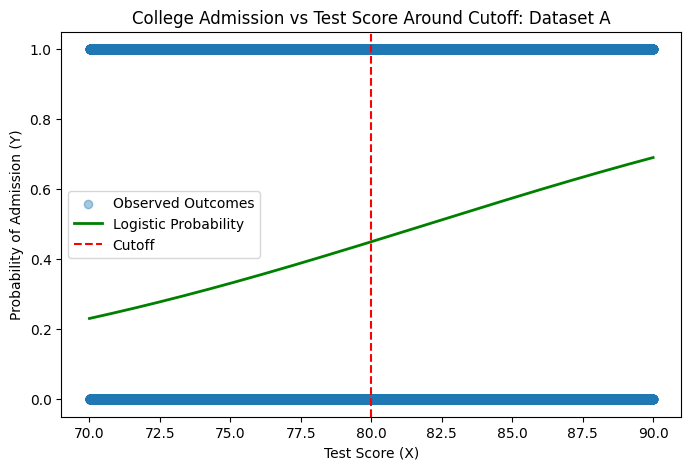

c:\Users\phxlab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


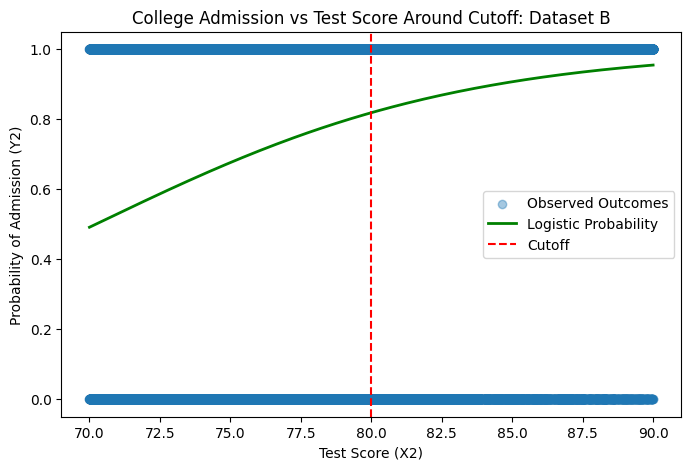

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load datasets
df_a = pd.read_csv("homework_4.2.a.csv")
df_b = pd.read_csv("homework_4.2.b.csv")

# List of datasets 
datasets = [("Dataset A", df_a, "X", "Y"), ("Dataset B", df_b, "X2", "Y2")]

# cutoff and bandwidth
cutoff = 80
band = 10

for name, df, x_col, y_col in datasets:
    df_band = df[(df[x_col] >= cutoff - band) & (df[x_col] <= cutoff + band)].copy()
    
    # Logistic regression
    X = df_band[[x_col]]
    y = df_band[y_col]
    model = LogisticRegression()
    model.fit(X, y)
    
    # Predicted probabilities
    x_vals = np.linspace(cutoff - band, cutoff + band, 200).reshape(-1,1)
    y_probs = model.predict_proba(x_vals)[:,1]
    
    # Plot
    plt.figure(figsize=(8,5))
    plt.scatter(df_band[x_col], df_band[y_col], alpha=0.4, label='Observed Outcomes')
    plt.plot(x_vals, y_probs, color='green', linewidth=2, label='Logistic Probability')
    plt.axvline(cutoff, color='red', linestyle='--', label='Cutoff')
    plt.xlabel(f"Test Score ({x_col})")
    plt.ylabel(f"Probability of Admission ({y_col})")
    plt.title(f"College Admission vs Test Score Around Cutoff: {name}")
    plt.legend()
    plt.show()
